# Darstelung von Regelgliedern mit Python

## Imports 

Benötigte Imports und einstellen von matplotlib damit die Graphen im Notebook dargestellt werden.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import control as cs
import control.pzmap as pz

## Hilfsfunktionen

In [2]:
def __ausgabe_sprungantwort(system):
    y,t = cs.step(system)
    plt.plot(t,y)
    plt.xlabel("Zeit in s")
    plt.ylabel("Amplitude")

## P-Glied

Das P-Glied ist im Zeitbereich definiert als:
$$y(t) = K \cdot u(t)$$
Daraus ergibt sich folgende Übertragsfuntion im Bildbereich
$$h(s)=K$$
![Strukturbild](https://upload.wikimedia.org/wikipedia/commons/b/b5/P-controller-symbol-1.svg)

### Erzeugung des P-Systems

In [3]:
K = 1.0
#Die control Bibliothek kann nicht mit einer float umgehen, daher muss das System so erzeugt werden
P = cs.tf([0,K],[0,1])
print(P)


1
-
1



### Sprungantwort

Die Control Bibliothek kann die Funktion step nur auf sehr wenige Systeme aufrufen. Es funtkionieren nur Systeme mit Größeren Nenner als Zähler.

### Bodediagramm

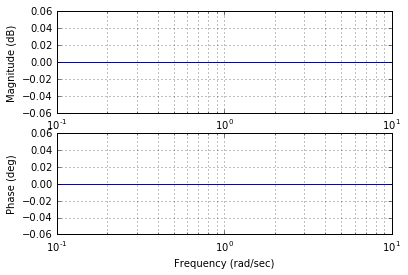

In [4]:
mag, phase, omega = cs.bode(P,dB=True)

### Ortskurve

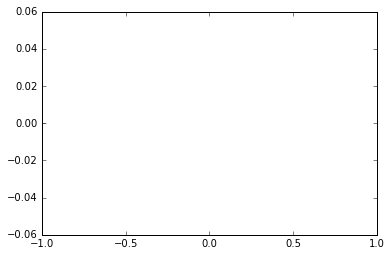

In [5]:
real, img, freq = cs.nyquist(P)

## I-Glied

Das I-Glied ist im Zeitbereich definiert als:
$$\dot y(t) = K \cdot u(t)$$
Daraus ergibt sich folgende Übertragsfuntion im Bildbereich
$$h(s)={\frac {K}{s}}$$
![Strukturbild](https://upload.wikimedia.org/wikipedia/commons/d/dd/I-controller-symbol-1.svg)

### Erzeugung des I-Systems

In [6]:
K = 1.0
I = cs.tf([0,K],[1,0])
print(I)


1
-
s



### Sprungantwort

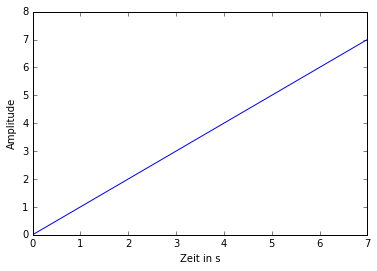

In [7]:
__ausgabe_sprungantwort(I)

### Bodediagramm

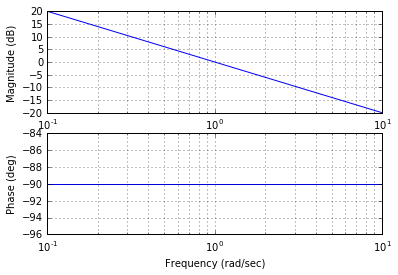

In [8]:
mag, phase, omega = cs.bode(I,dB=True)

### Ortskurve

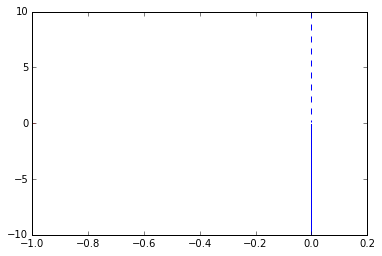

In [9]:
real, img, freq = cs.nyquist(I)

## D-Glied

Das D-Glied ist im Zeitbereich definiert als:
$$y(t) = K \cdot \dot u(t)$$
Daraus ergibt sich folgende Übertragsfuntion im Bildbereich
$$h(s)=K \cdot s$$
![Strukturbild](https://upload.wikimedia.org/wikipedia/commons/0/07/D-controller-symbol-1.svg)

Das D-Glied wird nur theoretisch betrachtet, da in der Sprungantwort ein Dirac-Impuls auftritt. Im realen System geht ein D-Glied immer mit einer Verzögerung einher.

### Erzeugung des D-Systems

In [10]:
K = 1.0
D = cs.tf([K,0],[0,1])
print(D)


s
-
1



### Sprungantwort

Die Sprungantwort des D-Gliedes ist die die Delta-Funktion.

### Bodediagramm

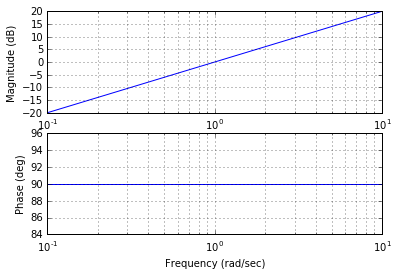

In [11]:
mag, phase, omega = cs.bode(D,dB=True)

### Ortskurve

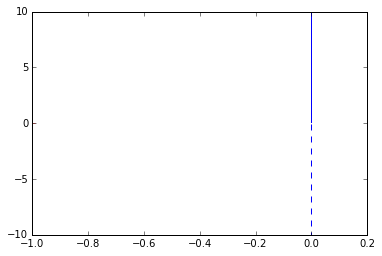

In [12]:
real, img, freq = cs.nyquist(D)

## PT1-Glied

Das PT1-Glied ist im Zeitbereich definiert als:
$$T \cdot \dot y(t) + y(t) = K \cdot u(t)$$
Daraus ergibt sich folgende Übertragsfuntion im Bildbereich
$$h(s)={\frac {K} {1+T \cdot s}}$$
![Strukturbild](https://upload.wikimedia.org/wikipedia/commons/b/bd/Pt1-controller-symbol-1.svg)

### Erzeugung des PT1-Systems

In [13]:
K = 1.0
T = 1.0
PT1 = cs.tf([0,K],[T,1])
print(PT1)


  1
-----
s + 1



### Sprungantwort

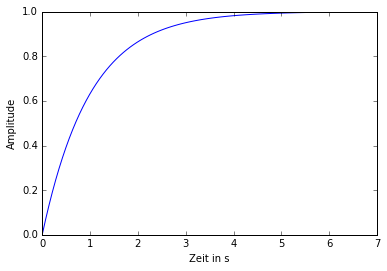

In [14]:
__ausgabe_sprungantwort(PT1)

### Bodediagramm

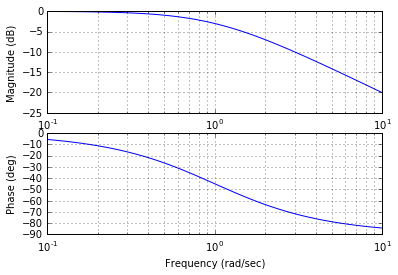

In [15]:
mag, phase, omega = cs.bode(PT1,dB=True)

### Ortskurve

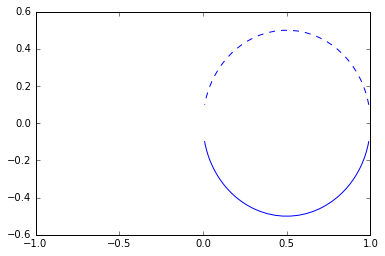

In [16]:
real, img, freq = cs.nyquist(PT1)

## PT2-Glied

Das PT2-Glied ist im Zeitbereich definiert als:
$$T^{2}{\ddot {y}}(t)+2dT{\dot {y}}(t)+y(t)=K \cdot u(t)$$
Daraus ergibt sich folgende Übertragsfuntion im Bildbereich
$$h(s)={\frac {K}{1+2dTs+T^{2}s^{2}}}$$
![Strukturbild](https://upload.wikimedia.org/wikipedia/commons/4/43/Pt2-controller-symbol-1.svg)

### Erzeugung des PT2-Systems

In [17]:
K = 2.0
T = 1.0
d = 1.0

PT2 = cs.tf([0,K],[T**2,2*d*T,1])
print(PT2)

d = 5
PT2_stark_gedaempft = cs.tf([0,K],[T**2,2*d*T,1])

d = 0.2
PT2_schwach_gedaempft = cs.tf([0,K],[T**2,2*d*T,1]) 


      2
-------------
s^2 + 2 s + 1



### Sprungantwort

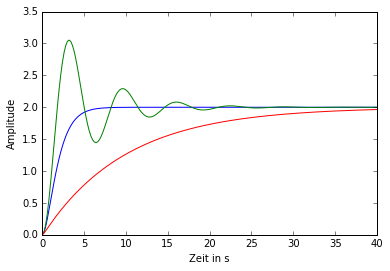

In [18]:
T = np.linspace(0,40,num=200)
y,t = cs.step(PT2,T=T)
plt.plot(t,y)
y,t = cs.step(PT2_schwach_gedaempft,T=T)
plt.plot(t,y)
y,t = cs.step(PT2_stark_gedaempft,T=T)
plt.plot(t,y)
plt.xlabel("Zeit in s")
plt.ylabel("Amplitude")

### Bodediagramm

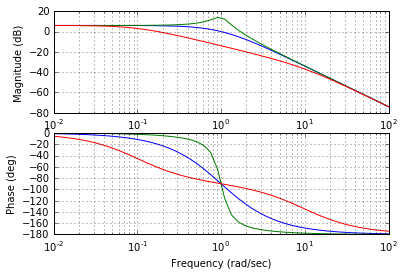

In [19]:
mag, phase, omega = cs.bode([PT2,PT2_schwach_gedaempft, PT2_stark_gedaempft],dB=True)

### Ortskurve
Die Nyquist Funktion versteht zwar Listen von Systemen gibt diese aber nicht so aus wie die Bode Funktion, daher erstmal in drei verschiedenen Bildern.

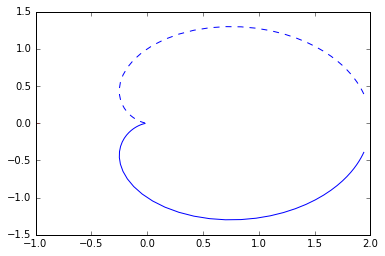

In [20]:
real, img, freq = cs.nyquist(PT2)

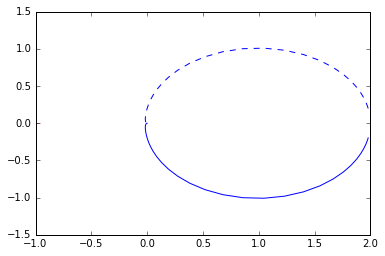

In [21]:
real, img, freq = cs.nyquist(PT2_stark_gedaempft)

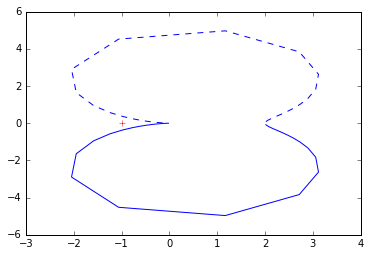

In [22]:
real, img, freq = cs.nyquist(PT2_schwach_gedaempft)